# MATLAB and netcdf file input/output

In [64]:
import numpy
import scipy
import matplotlib.pyplot as plt

import xarray
import scipy.io

import cartopy

% matplotlib inline

# Loading MATLAB files (```.mat```)

In [15]:
matfilename1 = 'randomInts.mat'
matfilename2 = 'randomNumbers.mat'
matfilename3 = 'zeros.mat'

In [16]:
scipy.io.loadmat(matfilename1)

{'A': array([[10,  5, 10,  1,  8,  2,  7,  3,  6,  8],
        [ 7,  9,  7,  1,  2,  2,  9, 10, 10, 10],
        [ 1,  2,  8,  9,  5,  5, 10,  4,  3,  2],
        [ 3,  5,  8,  7,  5, 10,  6,  2,  8,  6],
        [ 6, 10,  4,  4,  7,  4,  2,  3,  8,  5],
        [10,  8,  7, 10,  8,  6,  2,  7,  4,  1],
        [10, 10,  2,  1,  8,  3,  3,  5,  6,  4],
        [ 2,  7,  8,  5,  3,  8,  9,  4,  1,  2],
        [10,  1,  1,  4,  7,  3,  3,  9,  1,  8],
        [10,  9,  3,  8,  7,  6,  9,  6,  6,  4]], dtype=uint8),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Fri Mar  2 13:16:27 2018',
 '__version__': '1.0'}

In [17]:
matfile1 = scipy.io.loadmat(matfilename1)
matfile2 = scipy.io.loadmat(matfilename2)
matfile3 = scipy.io.loadmat(matfilename3)

These files are loaded as a python ```dict``` (dictionary) object.  Dictionaries are structured as:

```dict = {'key1':values1, 'key2':values2, ...}```

To view all the keys in a given dictionary, use the ```dict.keys()``` method

In [20]:
matfile1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A'])

In [21]:
matfile1['A']

array([[10,  5, 10,  1,  8,  2,  7,  3,  6,  8],
       [ 7,  9,  7,  1,  2,  2,  9, 10, 10, 10],
       [ 1,  2,  8,  9,  5,  5, 10,  4,  3,  2],
       [ 3,  5,  8,  7,  5, 10,  6,  2,  8,  6],
       [ 6, 10,  4,  4,  7,  4,  2,  3,  8,  5],
       [10,  8,  7, 10,  8,  6,  2,  7,  4,  1],
       [10, 10,  2,  1,  8,  3,  3,  5,  6,  4],
       [ 2,  7,  8,  5,  3,  8,  9,  4,  1,  2],
       [10,  1,  1,  4,  7,  3,  3,  9,  1,  8],
       [10,  9,  3,  8,  7,  6,  9,  6,  6,  4]], dtype=uint8)

__Oops:__  Fix the error below to run the cell correctly

In [25]:
print(matfile2.keys())
print(matfile3.keys()

SyntaxError: unexpected EOF while parsing (<ipython-input-25-e57939aa51fd>, line 2)

In [26]:
B = matfile2['B']
C = matfile3['C']

## ==================== Questions ====================

### 1. How you look at A, B, and C?

* Print the data type of ```A```
* Print its shape

### 2. Can you store A, B, and C in _one_ dictionary and save all of that as a .mat file?

* Hint:  Just like there's a ```scipy.io.loadmat()``` function, there's a [```scipy.io.savemat()```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.savemat.html) function.

## ==================================================

In [30]:
?scipy.io.savemat

# Loading a NetCDF file

[GPCP precipitation data](https://www.esrl.noaa.gov/psd/data/gridded/data.gpcp.html) (2.5x2.5 degrees, monthly resolution)

In [79]:
nc_filename = 'precip.mon.mean.nc' # should already be in week2 directory
nc_file = xarray.open_dataset(nc_filename) # 'r' for read, 'w' for write

In [80]:
nc_file

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, nv: 2, time: 469)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 -78.75 -76.25 ...
  * lon        (lon) float32 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 ...
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 1979-03-01 ...
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes:
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    documentation:         h

## Extracting data (behaves a lot like a dictionary)

In [96]:
precip = nc_file['precip']
time = nc_file['time']
lat = nc_file['lat'].data
lon = nc_file['lon'].data

In [97]:
# calculate mean of full precip data set
precip_annual_mean = numpy.mean(precip, axis=0)

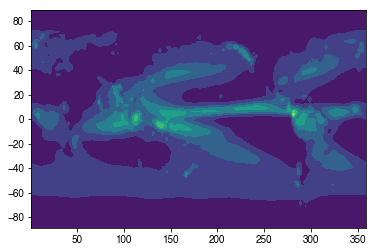

In [98]:
plt.contourf(lon,lat,precip_annual_mean)

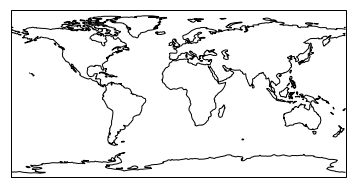

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())
ax.coastlines()

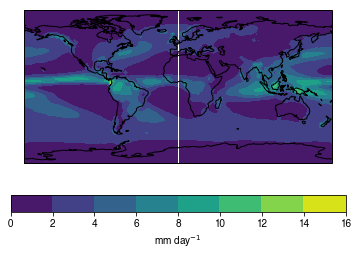

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())

contour_plot = ax.contourf(lon,lat,precip_annual_mean)
cbar = plt.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('mm day$^{-1}$')

ax.coastlines()

### Needs a cyclic point

In [101]:
import cartopy.util

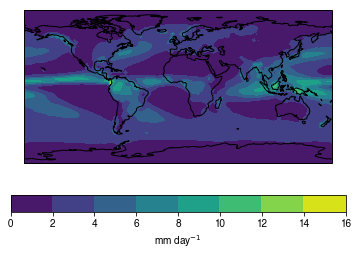

In [106]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=cartopy.crs.PlateCarree())

cyclic_precip, cyclic_lon = cartopy.util.add_cyclic_point(precip_annual_mean.data, coord=lon.data, axis=1)

contour_plot = ax.contourf(cyclic_lon,lat,cyclic_precip)
cbar = plt.colorbar(contour_plot, orientation='horizontal')
cbar.set_label('mm day$^{-1}$')

ax.coastlines()